In [210]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [211]:
df = pd.read_excel("Divorce Rates.xlsx")
df.head()

,Country/region,Continent,Marriage,Divorce,Actual,Percent,Data Source Year
0,Albania,Europe,8.1,1.7,4.76,20.99,(2018)
1,Algeria,Africa,10.1,1.6,6.31,15.84,(2013)
2,Armenia,Europe,6.0,1.0,6.00,16.67,(2011)
3,Australia,Oceania,4.6,2.0,2.30,43.48,(2017)
4,Austria,Europe,5.3,1.8,2.94,33.96,(2018)


In [212]:
data = df[["Marriage", "Divorce", "Data Source Year"]]
data.head()

,Marriage,Divorce,Data Source Year
0,8.1,1.7,(2018)
1,10.1,1.6,(2013)
2,6.0,1.0,(2011)
3,4.6,2.0,(2017)
4,5.3,1.8,(2018)


In [213]:
# remove parenthesis from "Data Source Year"
data["Data Source Year"] = data["Data Source Year"].str.replace(r'[()]',"")

C:\Users\fecavdar\AppData\Local\Temp\ipykernel_5068\3555661967.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\fecavdar\AppData\Local\Temp\ipykernel_5068\3555661967.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [214]:
data.head()

,Marriage,Divorce,Data Source Year
0,8.1,1.7,2018
1,10.1,1.6,2013
2,6.0,1.0,2011
3,4.6,2.0,2017
4,5.3,1.8,2018


In [215]:
print(f"Number of rows in data : {data.shape[0]}")
print(f"Number of columns in data : {data.shape[1]}")
print(f"Number of values in data : {data.count().sum()}")
print(f"Number of missing values in train data : {sum(data.isna().sum())}")

Number of rows in data : 105
Number of columns in data : 3
Number of values in data : 311
Number of missing values in train data : 4


In [216]:
print(data.isna().sum().sort_values(ascending = False))

Marriage            2
Divorce             2
Data Source Year    0
dtype: int64


In [217]:
data = data.dropna()

In [218]:
print(f"Number of rows in data : {data.shape[0]}")
print(f"Number of columns in data : {data.shape[1]}")
print(f"Number of values in data : {data.count().sum()}")
print(f"Number of missing values in train data : {sum(data.isna().sum())}")

Number of rows in data : 102
Number of columns in data : 3
Number of values in data : 306
Number of missing values in train data : 0


In [219]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Marriage,102.0,5.838824,2.464930,1.8,4.400,5.2,6.8,17.4
Divorce,102.0,1.751765,0.726371,0.4,1.225,1.7,2.2,4.1


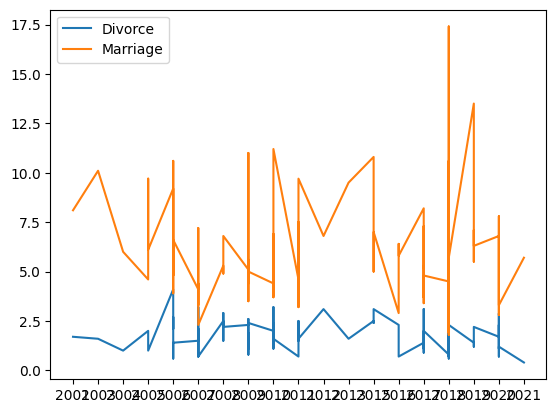

In [220]:
plt.plot(data["Data Source Year"].sort_values(), data["Divorce"])
plt.plot(data["Data Source Year"].sort_values(), data["Marriage"])
plt.legend(["Divorce", "Marriage"])
plt.show()

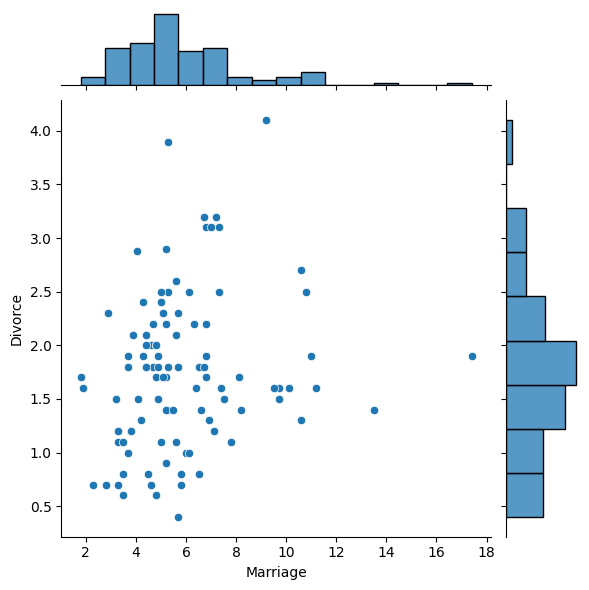

In [221]:
sns.jointplot(x = "Marriage", y = "Divorce", data = data)

In [222]:
fig = px.imshow(data.corr(), text_auto = True, aspect = 'auto', color_continuous_scale = "viridis")
fig.show()

C:\Users\fecavdar\AppData\Local\Temp\ipykernel_5068\3329566028.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [223]:
value = data.values
scaler = MinMaxScaler(feature_range = (0,1))
scaled = scaler.fit_transform(value)

In [224]:
x = np.delete(scaled, 1, 1)  #(data, second, column/row)
y_dummy = np.delete(scaled, 0, 1)
y = np.delete(y_dummy, 1, 1)

In [225]:
#x = data.drop(["Divorce"], axis = 1)
#y = data.iloc[:, 1:2]

In [226]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 12)
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(81, 1, 2) (21, 1, 2) (81,) (21,)


In [227]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [228]:
model = Sequential()
model.add(LSTM(100, input_shape = (x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "adam")

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100)               41200     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 41,301
Trainable params: 41,301
Non-trainable params: 0
_________________________________________________________________


In [229]:
# fit network
history = model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test), shuffle=False)

Epoch 1/40
3/3 [==============================] - 3s 217ms/step - loss: 0.1775 - val_loss: 0.1768
Epoch 2/40
3/3 [==============================] - 0s 20ms/step - loss: 0.1588 - val_loss: 0.1596
Epoch 3/40
3/3 [==============================] - 0s 23ms/step - loss: 0.1403 - val_loss: 0.1435
Epoch 4/40
3/3 [==============================] - 0s 21ms/step - loss: 0.1252 - val_loss: 0.1287
Epoch 5/40
3/3 [==============================] - 0s 26ms/step - loss: 0.1105 - val_loss: 0.1150
Epoch 6/40
3/3 [==============================] - 0s 25ms/step - loss: 0.0980 - val_loss: 0.1026
Epoch 7/40
3/3 [==============================] - 0s 30ms/step - loss: 0.0841 - val_loss: 0.0912
Epoch 8/40
3/3 [==============================] - 0s 32ms/step - loss: 0.0732 - val_loss: 0.0811
Epoch 9/40
3/3 [==============================] - 0s 25ms/step - loss: 0.0643 - val_loss: 0.0722
Epoch 10/40
3/3 [==============================] - 0s 25ms/step - loss: 0.0576 - val_loss: 0.0644
Epoch 11/40
3/3 [===========

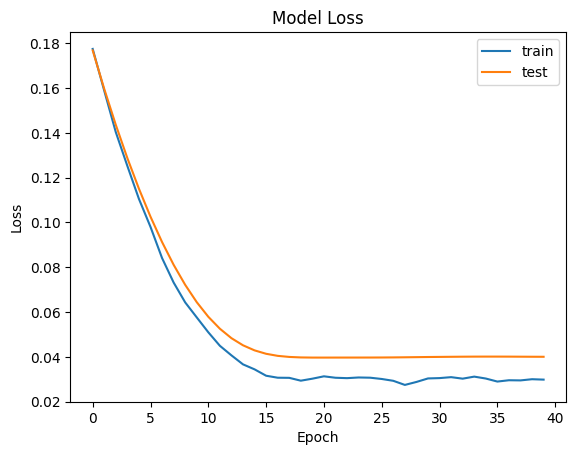

In [230]:
# summarize history loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "test"], loc = "upper right")
plt.show()

In [231]:
# Make Prediction
y_pred = model.predict(x_test)
x_test = x_test.reshape((x_test.shape[0], 2))

#invert scaling for forecast
inv_y_pred = np.concatenate((y_pred, x_test[:, -2:]), axis = 1)
inv_y_pred = scaler.inverse_transform(inv_y_pred)
inv_y_pred = inv_y_pred[:, 0]

# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, x_test[:, -2:]), axis = 1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_y_pred))
print("Test RMSE : %.3f" %rmse)

1/1 [==============================] - 0s 400ms/step
Test RMSE : 3.122


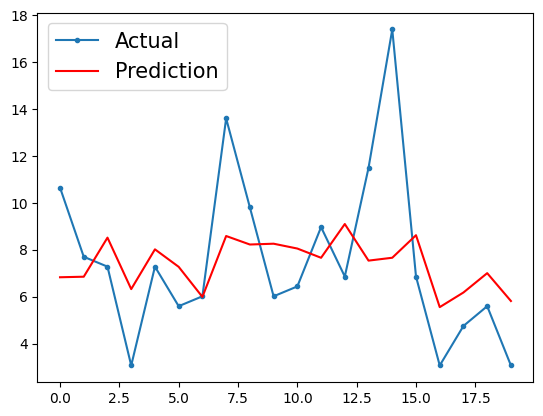

In [232]:
a = [x for x in range(20)]

plt.plot(a, inv_y[:20], marker = ".", label = "Actual")
plt.plot(a, inv_y_pred[:20], color = "r", label = "Prediction")
plt.legend(fontsize = 15)
plt.show()